In [1]:
#Trabajo realizado por Alfredo Ricci Vásquez y Nicolás Rangel Jurado.
%pylab inline
from sympy import *
init_printing(use_unicode=True)
from scipy import interpolate as inte

Populating the interactive namespace from numpy and matplotlib


# Parte 1

### Punto A

In [2]:
def lagrange(N):
   
    t,f,h= symbols('t f h')
    
    Ts=list([])
    Fs=list([])
    polis=[]
        
    for i in range (0,N):
        
        #Creamos dos listas de símbolos para operar posteriormente.
        tt=symbols("t"+ str(i))
        f=symbols("f"+ str(i))
        Ts.append(tt)
        Fs.append(f)
        
        poli=0
        
        
        polis.append(Fs[i])  #Este es el primer factor del cada subpolinomio 
         
    for x in range (0,N):
        for j in range (0,N):
            
            if (j!=x):
        
                polis[x]=polis[x]*(t-Ts[j])
                polis[x]=polis[x]/(Ts[x]-Ts[j])
            
    poli=sum(polis)        
    
    
    return(poli)  

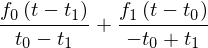

In [3]:
lagrange(2)

### Punto B

In [4]:
def adams(m):
    
    fun=lagrange(m)
    
    t,f,h,t0= symbols('t f h t0')  #Declaro símbolos que aparecen en la función fun.
    listaT=list(symbols('t:%d'%m)) #Crea m cantidad de símbolos para t.

    listaTemp=[] #En esta lista guardaré los t's expresados en términos de t0 y h como lo pide el enunciado para poder hacer los reemplazos necesarios.
    
    for i in range(m):
        
        #Este ciclo justamente es para generar las igualdades descritas anteriormente.
        igualdad=(listaT[i],listaT[0]-i*h)
        listaTemp.append(igualdad)
        
    fun=fun.subs(listaTemp) #la función .subs me permite hacer los reemplazos necesarios para poder dejar todo el polinomio en funcion de dos términos.
    resp=integrate((fun),(t,t0,t0+h))  #Se integra la función como pide el método Adams-Bashforth.
    
    return(simplify(resp))

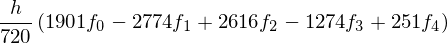

In [5]:
adams(5)

# Parte B

### Punto A

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [7]:
#DEfinimos las constantes a usar en el prblema
g=6.67348*10**(-11) # unidades SI
den=400*4*pi*g # en kg/m3 la densidad
L=3000 # en m
Nl=101 # para tener 3km
xmin=-L/2
xmax= L/2
ymin=-L/2
ymax= L/2
zmin=-L/2
zmax=-L/2
#Creamos las coordenadas de los tres ejes
xcoords=np.linspace(xmin,xmax,Nl)
ycoords=np.linspace(ymin,ymax,Nl)
zcoords=np.linspace(ymin,ymax,Nl)
xmesh,ymesh,zmesh=np.meshgrid(xcoords,ycoords,zcoords)
Dx=(xmax-xmin)/Nl
density=np.zeros((Nl,Nl,Nl))
#ajustamos el cubo, como una densidad particular
density[47:55,47:55,47:55]=den          
field=g*400*270**3/sqrt(xmesh**2+ymesh**2+zmesh**2)  
#evitamos la divisón entre cero.
field[50,50,50]=field[50,50,49]
NumIter=5000

/Users/AlfredoRicci/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in true_divide


In [ ]:
#iteramos para poder solucionar la ecuación.
scaled_density=Dx**2*density
for __ in range(NumIter):
    field=1/6.*(np.roll(field,1,axis=0)+np.roll(field,-1,axis=0)+np.roll(field,1,axis=1)+np.roll(field,-1,axis=1)+np.roll(field,1,axis=2)+np.roll(field,-1,axis=2)-scaled_density)
    field[0]=0.
    field[-1]=0.
    field[:,0]=0.
    field[:,-1]=0.
    field[:,:,0]=0.
    field[:,:,-1]=0.

In [ ]:
#Graficamos lo encontrado.
figure(figsize=(12,10))
planoyz=field[51]
plt.pcolor(ymesh[:,51],zmesh[51],planoyz,cmap='gist_heat')
plt.colorbar()
plt.contour(ymesh[:,51],zmesh[51],planoyz,[-16,-8,-4,-2,-1],color='black')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
title("Potencial Gravitacional")
ylabel("y(m)")
xlabel("z(m)")
plt.show()

### Punto B

In [ ]:
#Se grafica un corte transversal
figure(figsize(10,10))
planoyz=field[51]
ejez=field[51,51]
plot(zcoords,ejez,"o",ms=3)
title("Potencial Gravitacional")
ylabel("Potencial")
ylabel("z(m)")

In [ ]:
#Se repite el proceso anterior, usando varias masas puntuales
masaN=(400*270**3)/(9**3)
field1=g*masaN/sqrt(xmesh**2+ymesh**2+zmesh**2)
scaled_density=Dx**2*density
for __ in range(NumIter):
    field1=1/6.*(np.roll(field,1,axis=0)+np.roll(field,-1,axis=0)+np.roll(field,1,axis=1)+np.roll(field,-1,axis=1)+np.roll(field,1,axis=2)+np.roll(field,-1,axis=2)-scaled_density)
    field1[0]=0.
    field1[-1]=0.
    field1[:,0]=0.
    field1[:,-1]=0.
    field1[:,:,0]=0.
    field1[:,:,-1]=0.
field1=field1*(9**3)
field1[50,50,50]=field1[50,50,49]

In [ ]:
#Se grafica un corte transversal
figure(figsize(10,10))
planoyz=field[51]
ejez=field[51,51]
ejez1=field1[51,51]
plot(zcoords,ejez1)
plot(zcoords,ejez,"o",ms=3)
title("Potencial Gravitacional")
ylabel("Potencial")
ylabel("z(m)")

### Punto C

In [ ]:
zforward = np.roll(ejez,-1) # toma el arreglo y y lo mueve una posición hacia la izquierda
zbackward = np.roll(ejez,1)
derpot = (zforward-zbackward)/(2.)

#Se cmabia de signo debido a la que es "Menos la derivada"
derpot=-1*derpot
#Se eliminan el primer y último dato
derpot=derpot[1:-1]

In [ ]:
figure(figsize(10,10))
plot(zcoords[1:-1],derpot,"o",ms=3)
title("Campo gravitatorio")
xlabel("z(m)")
ylabel("Campo gravitatorio")

### Punto D

In [ ]:
#Interpolamos los datos.
interpol=inte.interpolate.interp1d(zcoords[1:-1],derpot)

In [ ]:
#Se usan ecuaciones de movimiento rectilineo, durante tramos cortos para aproximar el movimiento
def VelocidadFinal(vo,a,x):
    #Definimos velocidad final, en terminos de velocidad inicial aceleración y distancia.
    vf=-1*sqrt(abs(vo**2+2*a*x))
    return(vf)

In [ ]:
def darDeltaT(vo,vf,a):
    #entregamos el tiempo en ese pequeño intervalo de distancia.
    return (vf-vo)/a

In [ ]:
#definimos constantes iniciales
xi=500
vi=0
xstep=-0.01
tiempoTot=0
#Recorremos hasta llegar a la cara
while(xi>0):
    #Encontramos el cambio de tiempo para el instante.
    dt=darDeltaT(vi,VelocidadFinal(vi,interpol(xi),xstep),interpol(xi))
    tiempoTot+=dt
    xi+=xstep
    vi=VelocidadFinal(vi,interpol(xi),xstep)# Ajustamos la nueva velocidad inicial, como la final del paso anterior.
print("El tiempo necesario para llegar al cubo fue de: ", tiempoTot, "segundos") 